In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
import warnings
import pickle
import os
import cv2
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16, preprocess_input
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
source_path_train = '/kaggle/input/brain-tumor-classification-mri/Training/'
source_path_test ='/kaggle/input/brain-tumor-classification-mri/Testing/'
categories = os.listdir(source_path_train)
for category in categories:
    os.listdir(os.path.join(source_path_train,category))
    
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }
classes   

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

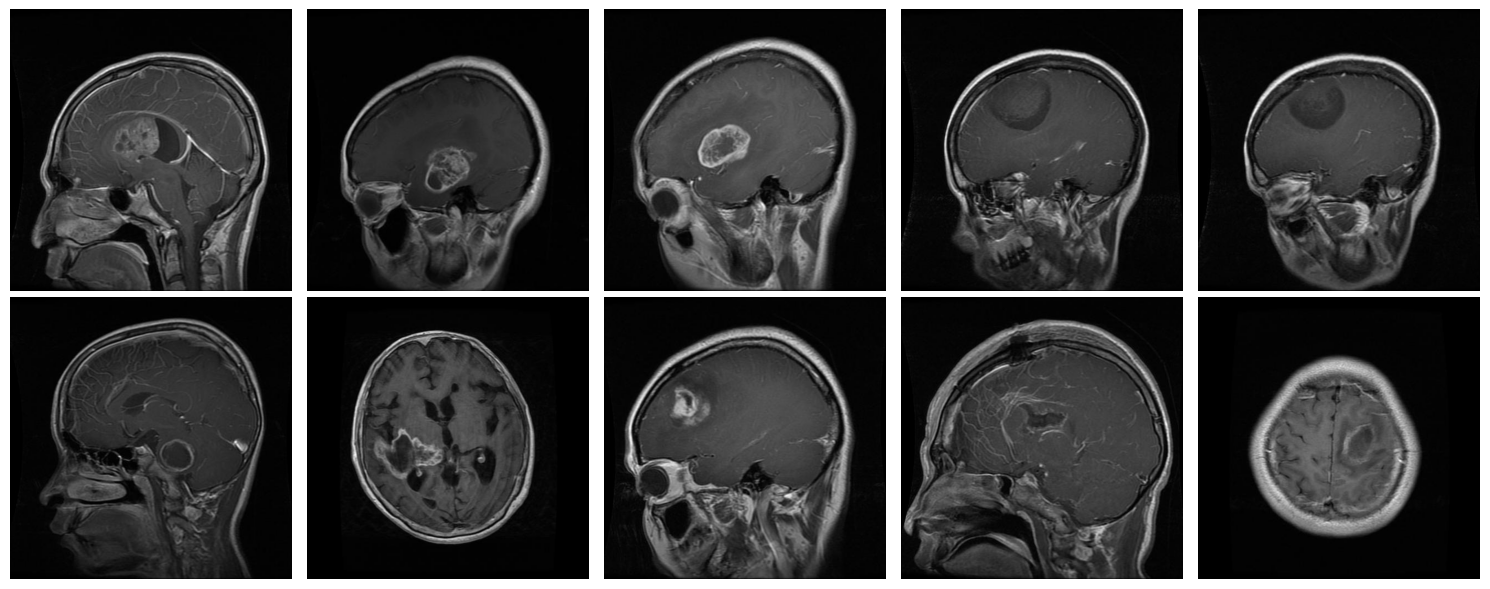

In [3]:
path_image= '/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
random_indices = random.sample(range(1, 101), 10)

for i, idx in enumerate(random_indices, 1):
    file_path = os.path.join(path_image, f'gg ({idx}).jpg')
    image = Image.open(file_path)
    subplot_row = (i - 1) // 5
    subplot_col = (i - 1) % 5
    axes[subplot_row, subplot_col].imshow(image)
    axes[subplot_row, subplot_col].axis('off')  
plt.tight_layout()   
plt.show()

In [4]:

classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }

In [5]:

X = []
Y = []
for cls in classes:
    pth = source_path_train + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])
for cls in classes:
    pth = source_path_test + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])
X = np.array(X)
Y = np.array(Y)
pd.Series(Y).value_counts()

1    937
0    926
3    901
2    500
Name: count, dtype: int64

In [6]:
np.unique(Y)

array([0, 1, 2, 3])

In [7]:
X.shape

(3264, 200, 200)

In [8]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3264, 40000)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)

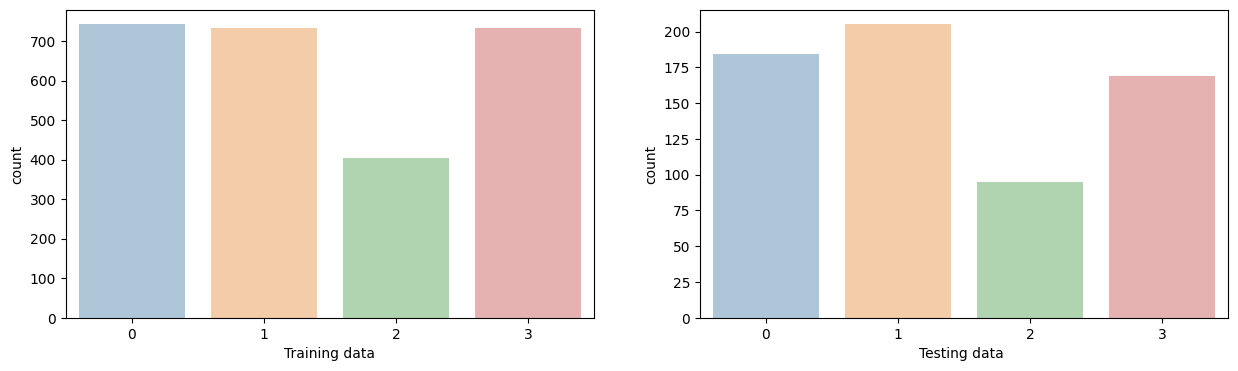

In [10]:
plt.figure(figsize = (15,4));
lis = ['Training data', 'Testing data ']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j,alpha=0.4 );
    plt.xlabel(lis[i])

In [11]:
print(X_train.shape, X_test.shape)

(2611, 40000) (653, 40000)


In [12]:
X_train_updated = X_train.reshape(len(X_train), -1)
X_test_updated = X_test.reshape(len(X_test), -1)
X_train_updated.shape ,X_test_updated.shape


((2611, 40000), (653, 40000))

# Feature Scaling

In [13]:
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())
X_train_updated = X_train_updated/255
X_test_updated = X_test_updated/255
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:

names = []
accuracies = []
finalResults = []



# 

# Logistic Regression

In [15]:
lg = LogisticRegression(C=0.1)
lg.fit(X_train_updated, y_train)
y_pred =lg.predict(X_test_updated)
accuracy = accuracy_score( y_test,y_pred)
CM = confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
name ='Logistic Regression'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))

Accuracy :  80.09188361408881 %
Classification Report is :                precision    recall  f1-score   support

           0       0.76      0.77      0.76       184
           1       0.78      0.71      0.74       205
           2       0.78      0.84      0.81        95
           3       0.88      0.93      0.90       169

    accuracy                           0.80       653
   macro avg       0.80      0.81      0.80       653
weighted avg       0.80      0.80      0.80       653



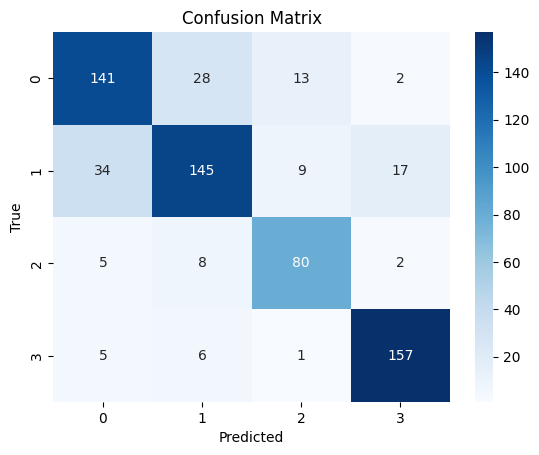

In [16]:
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train_updated, y_train)
y_pred =rf.predict(X_test_updated)
accuracy = accuracy_score( y_test,y_pred)
CM_rf = confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
name ='Random Forest'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))

Accuracy :  85.75803981623277 %
Classification Report is :                precision    recall  f1-score   support

           0       0.86      0.84      0.85       184
           1       0.83      0.81      0.82       205
           2       0.85      0.86      0.86        95
           3       0.88      0.93      0.90       169

    accuracy                           0.86       653
   macro avg       0.86      0.86      0.86       653
weighted avg       0.86      0.86      0.86       653



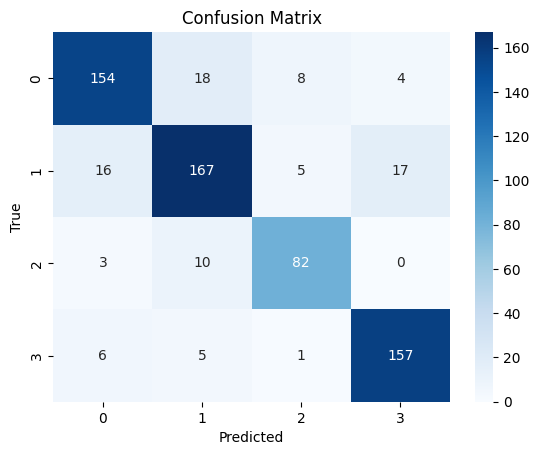

In [18]:
sns.heatmap(CM_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# SVM

In [19]:
svm = SVC(kernel='rbf')
svm.fit(X_train_updated, y_train)
y_pred =svm.predict(X_test_updated)
accuracy = accuracy_score( y_test,y_pred)
CM_svm = confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
name ='SVM'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))


Accuracy :  83.00153139356816 %
Classification Report is :                precision    recall  f1-score   support

           0       0.80      0.80      0.80       184
           1       0.79      0.74      0.77       205
           2       0.87      0.84      0.86        95
           3       0.88      0.96      0.92       169

    accuracy                           0.83       653
   macro avg       0.84      0.84      0.84       653
weighted avg       0.83      0.83      0.83       653



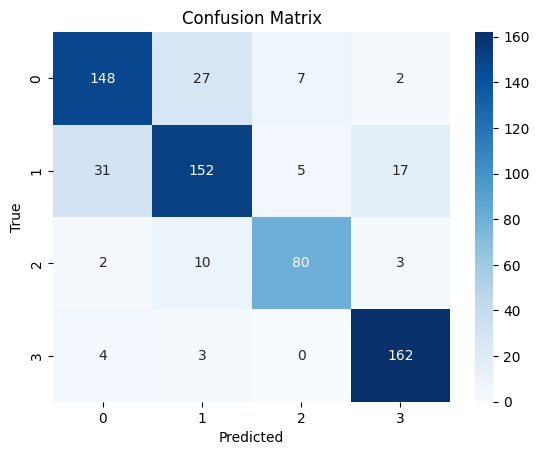

In [20]:
sns.heatmap(CM_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_updated, y_train)
y_pred =knn.predict(X_test_updated)
accuracy = accuracy_score( y_test,y_pred)
CM_knn = confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
name ='KNN'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))


Accuracy :  70.75038284839204 %
Classification Report is :                precision    recall  f1-score   support

           0       0.64      0.86      0.73       184
           1       0.81      0.40      0.53       205
           2       0.66      0.80      0.72        95
           3       0.77      0.87      0.82       169

    accuracy                           0.71       653
   macro avg       0.72      0.73      0.70       653
weighted avg       0.73      0.71      0.69       653



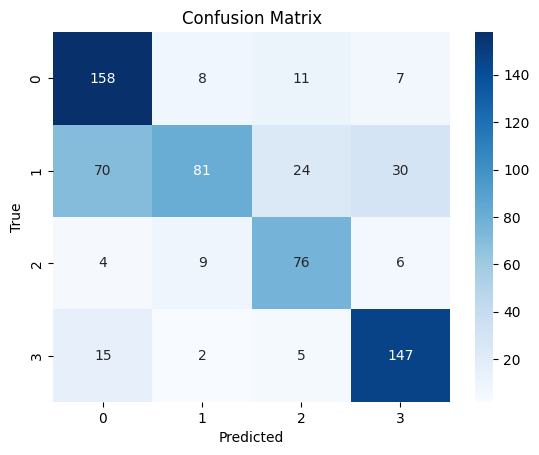

In [22]:
sns.heatmap(CM_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# NaiveBayes

In [23]:
nv =GaussianNB()
nv.fit(X_train_updated, y_train)
y_pred =nv.predict(X_test_updated)
accuracy = accuracy_score( y_test,y_pred)
CM_nv= confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
name ='NaiveBayes'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))

Accuracy :  49.004594180704444 %
Classification Report is :                precision    recall  f1-score   support

           0       0.40      0.89      0.55       184
           1       0.39      0.06      0.11       205
           2       0.53      0.54      0.53        95
           3       0.79      0.54      0.65       169

    accuracy                           0.49       653
   macro avg       0.53      0.51      0.46       653
weighted avg       0.52      0.49      0.44       653



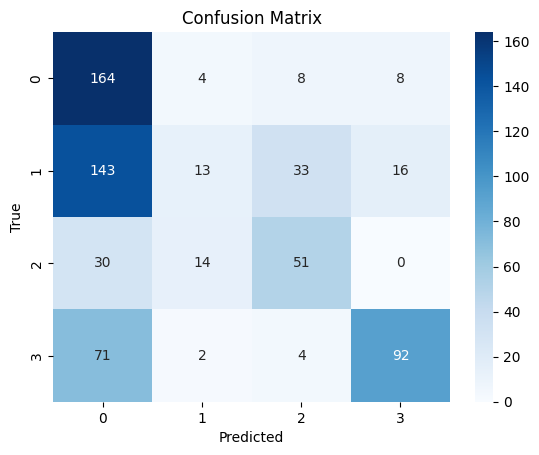

In [24]:
sns.heatmap(CM_nv, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [25]:

finalResults_df = pd.DataFrame({'Model': names, 'Accuracy': accuracies})
finalResults_df

,Model,Accuracy
0,Logistic Regression,0.800919
1,Random Forest,0.857580
2,SVM,0.830015
3,KNN,0.707504
4,NaiveBayes,0.490046


In [26]:
def read_data(path1,path2,image_size = 150):
    X = []
    y = []
    labels = os.listdir(path1)
    for label in labels:
        for image in tqdm(os.listdir(path1 + label)):
            img = cv2.imread(os.path.join(path1 + label,image))
            img = cv2.resize(img,(image_size, image_size))
            X.append(img)
            y.append(label)
    for label in labels:
        for image in tqdm(os.listdir(path2 + label)):
            img = cv2.imread(os.path.join(path2 + label,image))
            img = cv2.resize(img,(image_size, image_size))
            X.append(img)
            y.append(label)
            
    return np.array(X), np.array(y)
X_train, y_train = read_data(source_path_train,source_path_test)
X_train, y_train = shuffle(X_train, y_train, random_state=45)
X_test, y_test= read_data(source_path_test ,source_path_test )
X_test, y_test = shuffle(X_test, y_test, random_state=45)

100%|██████████| 100/100 [00:00<00:00, 350.65it/s]


In [27]:
print(f"X Train shape is --> {X_train.shape}\ny Train shape is --> {y_train.shape}\nX Test shape is --> {X_test.shape}\ny Test shape is --> {y_test.shape}")

X Train shape is --> (3264, 150, 150, 3)
y Train shape is --> (3264,)
X Test shape is --> (788, 150, 150, 3)
y Test shape is --> (788,)


In [28]:
labels = os.listdir(source_path_train)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
labels = os.listdir(source_path_test)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [29]:
labels

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

In [30]:
print(f"X Train shape is --> {X_train.shape}\ny Train shape is --> {y_train.shape}\nX Test shape is --> {X_test.shape}\ny Test shape is --> {y_test.shape}")

X Train shape is --> (3264, 150, 150, 3)
y Train shape is --> (3264, 4)
X Test shape is --> (788, 150, 150, 3)
y Test shape is --> (788, 4)


In [31]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [32]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [33]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())
X_train = X_train/255
X_test = X_test/255
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


# CNN

In [34]:
def create_model():
  
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation="softmax")
    ])
   


  

    return model

In [35]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)

In [36]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
92/92 [==============================] - 9s 39ms/step - loss: 0.4189 - accuracy: 0.5792 - val_loss: 0.2636 - val_accuracy: 0.7951
Epoch 2/20
92/92 [==============================] - 3s 30ms/step - loss: 0.2254 - accuracy: 0.8185 - val_loss: 0.1809 - val_accuracy: 0.8440
Epoch 3/20
92/92 [==============================] - 3s 30ms/step - loss: 0.1251 - accuracy: 0.9105 - val_loss: 0.1272 - val_accuracy: 0.9052
Epoch 4/20
92/92 [==============================] - 3s 30ms/step - loss: 0.0633 - accuracy: 0.9557 - val_loss: 0.1048 - val_accuracy: 0.9327
Epoch 5/20
92/92 [==============================] - 3s 30ms/step - loss: 0.0379 - accuracy: 0.9724 - val_loss: 0.0909 - val_accuracy: 0.9419
Epoch 6/20
92/92 [==============================] - 3s 30ms/step - loss: 0.0172 - accuracy: 0.9888 - val_loss: 0.0925 - val_accuracy: 0.9266
Epoch 7/20
92/92 [==============================] - 3s 30ms/step - loss: 0.0170 - accuracy: 0.9905 - val_loss: 0.1438 - val_accuracy: 0.9266
Epoch 8/20
92

20/20 - 1s - loss: 0.0614 - accuracy: 0.9772 - 878ms/epoch - 44ms/step
Test accuracy: 0.9771573543548584


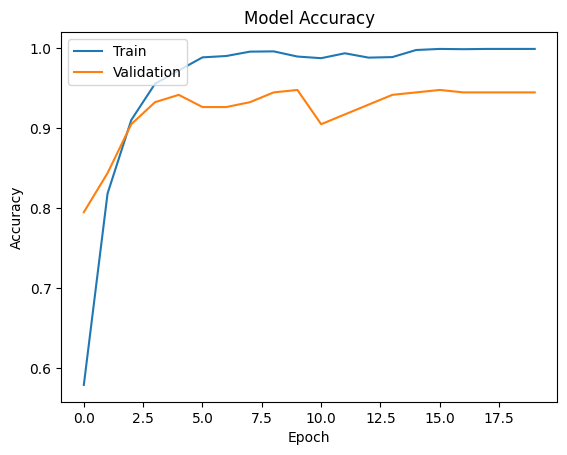

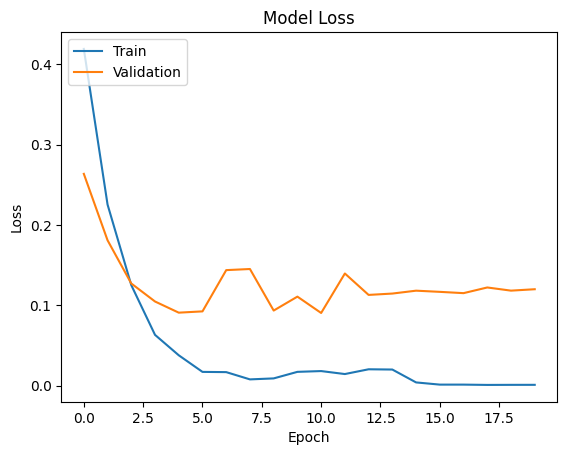

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(history .history['accuracy'])
plt.plot(history .history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 236ms/step


1

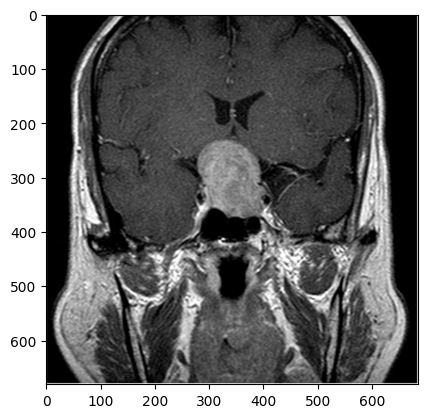

In [38]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(11).jpg')
plt.imshow(img)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array=img_array.reshape(1,150,150,3)

a=model.predict(img_array)
indices = a.argmax()
indices


# CNN ResNet v2


In [39]:

resnet_v2 = InceptionResNetV2(include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3))

219055592/219055592 [==============================] - 9s 0us/step


In [40]:
None 

In [41]:
def create_model_ResNet():
    model = resnet_v2.output
    model = tf.keras.layers.GlobalAveragePooling2D()(model)
    model = tf.keras.layers.Dense(60,activation='relu',kernel_initializer='GlorotNormal')(model)
    model = tf.keras.layers.Dense(60,activation='relu')(model)
    model = tf.keras.layers.Dense(4,activation='softmax')(model)
    model = tf.keras.models.Model(inputs=resnet_v2.input, outputs = model)
    model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


In [42]:
model = create_model_ResNet()
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
92/92 [==============================] - 131s 328ms/step - loss: 0.2005 - accuracy: 0.8383 - val_loss: 0.2507 - val_accuracy: 0.7920
Epoch 2/20
92/92 [==============================] - 23s 254ms/step - loss: 0.1031 - accuracy: 0.9258 - val_loss: 0.3658 - val_accuracy: 0.8012
Epoch 3/20
92/92 [==============================] - 23s 254ms/step - loss: 0.0511 - accuracy: 0.9663 - val_loss: 0.0909 - val_accuracy: 0.9388
Epoch 4/20
92/92 [==============================] - 23s 251ms/step - loss: 0.0626 - accuracy: 0.9595 - val_loss: 0.2111 - val_accuracy: 0.8471
Epoch 5/20
92/92 [==============================] - 23s 251ms/step - loss: 0.0503 - accuracy: 0.9666 - val_loss: 0.0766 - val_accuracy: 0.9450
Epoch 6/20
92/92 [==============================] - 23s 252ms/step - loss: 0.0415 - accuracy: 0.9700 - val_loss: 0.1473 - val_accuracy: 0.8869
Epoch 7/20
92/92 [==============================] - 23s 252ms/step - loss: 0.0375 - accuracy: 0.9748 - val_loss: 0.0962 - val_accuracy: 0.941

20/20 - 7s - loss: 0.0735 - accuracy: 0.9340 - 7s/epoch - 371ms/step
Test accuracy: 0.9340101480484009


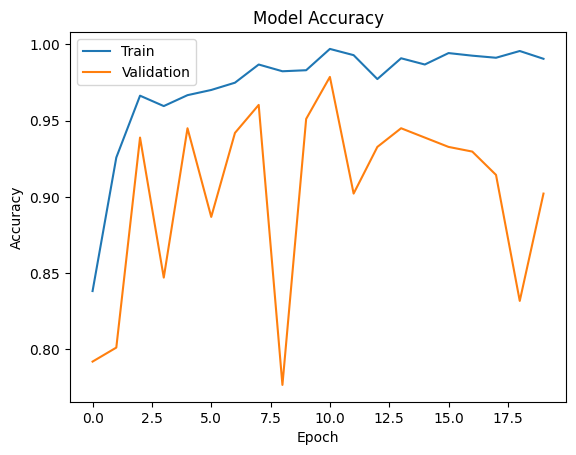

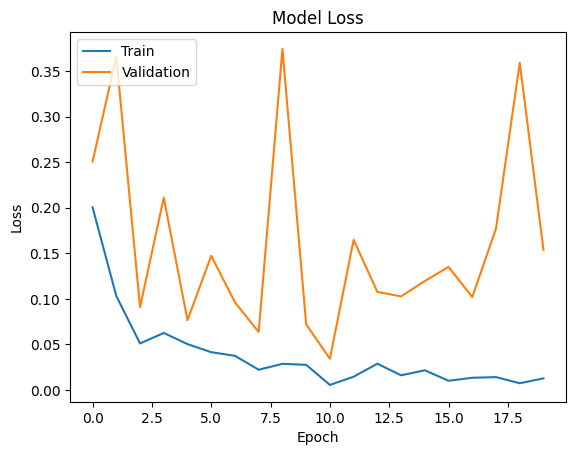

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(history .history['accuracy'])
plt.plot(history .history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 4s 4s/step


3

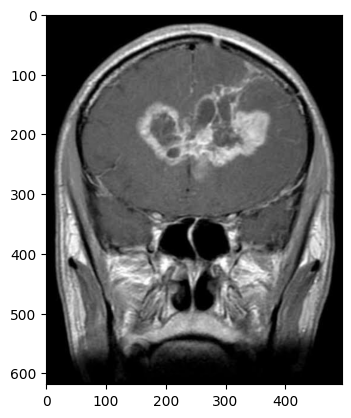

In [44]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg')
plt.imshow(img)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array=img_array.reshape(1,150,150,3)
a=model.predict(img_array)
indices = a.argmax()
indices

# CNN  VGG16 

In [45]:

vgg16= VGG16(include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [46]:
def create_model_VGG16():
    model = vgg16.output
    model = tf.keras.layers.GlobalAveragePooling2D()(model)
    model = tf.keras.layers.Dense(60,activation='relu',kernel_initializer='GlorotNormal')(model)
    model = tf.keras.layers.Dense(60,activation='relu')(model)
    model = tf.keras.layers.Dense(4,activation='softmax')(model)
    model = tf.keras.models.Model(inputs=vgg16.input, outputs = model)
    model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [47]:
model = create_model_VGG16()
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
92/92 [==============================] - 37s 281ms/step - loss: 0.5878 - accuracy: 0.2789 - val_loss: 0.5641 - val_accuracy: 0.2752
Epoch 2/50
92/92 [==============================] - 19s 209ms/step - loss: 0.5560 - accuracy: 0.2901 - val_loss: 0.5554 - val_accuracy: 0.2722
Epoch 3/50
92/92 [==============================] - 19s 207ms/step - loss: 0.5445 - accuracy: 0.3313 - val_loss: 0.6015 - val_accuracy: 0.2936
Epoch 4/50
92/92 [==============================] - 19s 207ms/step - loss: 0.5157 - accuracy: 0.4178 - val_loss: 0.4855 - val_accuracy: 0.4893
Epoch 5/50
92/92 [==============================] - 19s 209ms/step - loss: 0.4327 - accuracy: 0.5628 - val_loss: 0.4038 - val_accuracy: 0.5994
Epoch 6/50
92/92 [==============================] - 19s 209ms/step - loss: 0.3690 - accuracy: 0.6418 - val_loss: 0.3271 - val_accuracy: 0.6911
Epoch 7/50
92/92 [==============================] - 19s 208ms/step - loss: 0.3372 - accuracy: 0.6888 - val_loss: 0.3077 - val_accuracy: 0.7217

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



92/92 [==============================] - 19s 208ms/step - loss: 0.0087 - accuracy: 0.9946 - val_loss: 0.2610 - val_accuracy: 0.9358


20/20 - 7s - loss: 0.1320 - accuracy: 0.9848 - 7s/epoch - 344ms/step
Test accuracy: 0.9847715497016907


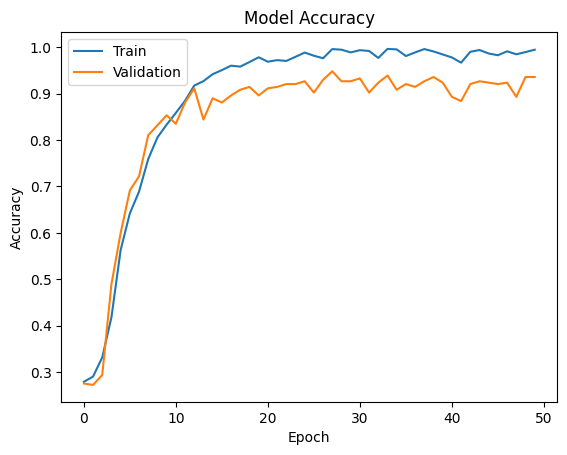

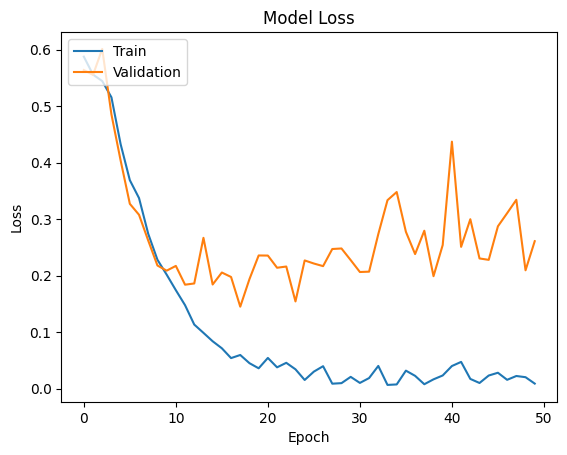

In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(history .history['accuracy'])
plt.plot(history .history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()